SWE PREDICTION IN THE ABSAROKA BEARTOOTHS WILDERNESS

In [5]:
# ===== IMPORT LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


Combine CSVs from Google Earh Engine Output and 
Replace Paths with your paths

In [7]:
import os
# Set path to your folder with CSVs
csv_folder = '/home/r36g568/LRES525Project/data/raw/'  # 🔁 Update this to your actual path

# List all files in the folder
all_files = os.listdir(csv_folder)

# Filter for CSVs that do NOT contain 'XGBoost'
csv_files = [f for f in all_files if f.endswith('.csv') and 'XGBoost' not in f]

# Load and combine
combined_df = pd.concat(
    [pd.read_csv(os.path.join(csv_folder, f)).assign(source_file=f) for f in csv_files],
    ignore_index=True
)

# Export the combined file
combined_df.to_csv(os.path.join(csv_folder, 'Combined_SNOTEL_Buffer_Stats_5km.csv'), index=False)

print(f"✅ Combined {len(csv_files)} files into 'Combined_SNOTEL_Buffer_Stats_5km.csv'")


✅ Combined 14 files into 'Combined_SNOTEL_Buffer_Stats_5km.csv'


Add Season and Year to the CSV so it can be read by the code

In [8]:
import pandas as pd
import re

# Load the combined CSV
df = pd.read_csv('/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km.csv')

# Extract season from file name
def extract_season(filename):
    if 'Spring' in filename:
        return 'Spring'
    elif 'Winter' in filename:
        return 'Winter'
    return 'Unknown'

# Extract year using regex
def extract_year(filename):
    match = re.search(r'(\d{4})', filename)
    return match.group(1) if match else 'Unknown'

# Apply both functions
df['season'] = df['source_file'].apply(extract_season)
df['year'] = df['source_file'].apply(extract_year)

# Save to new CSV
output_path = '/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year.csv'
df.to_csv(output_path, index=False)

print("✅ Added 'season' and 'year' columns.")


✅ Added 'season' and 'year' columns.


Replace Synthetic SWE Values with Actual SWE Values from NRCS AOI SNOTEL Values

In [9]:
# Replace with actual SWE Values

import pandas as pd
import random

# Load your buffer CSV with season and year
csv_path = "/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year.csv"
df = pd.read_csv(csv_path)

# Generate synthetic SWE values
random.seed(42)  # For reproducibility
df['mean_swe_in'] = df.apply(lambda x: round(random.uniform(5.0, 30.0), 2), axis=1)

# Save to new CSV
output_path = "/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_With_SWE.csv"
df.to_csv(output_path, index=False)

print(f"✅ Synthetic SWE values added and saved to: {output_path}")



✅ Synthetic SWE values added and saved to: /home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_With_SWE.csv


In [10]:
import pandas as pd
import re

# Load the raw combined file
df = pd.read_csv("/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km.csv")

# Extract season and year from the filename in 'source_file'
def extract_season(file):
    if 'Spring' in file:
        return 'Spring'
    elif 'Winter' in file:
        return 'Winter'
    return 'Unknown'

def extract_year(file):
    match = re.search(r'(20\d{2})', file)
    return match.group(1) if match else 'Unknown'

df['season'] = df['source_file'].apply(extract_season)
df['year'] = df['source_file'].apply(extract_year)

# Drop rows where year could not be parsed
df = df[df['year'] != 'Unknown']
df['year'] = df['year'].astype(int)

# Save cleaned version
df.to_csv("/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_CLEAN.csv", index=False)
print("✅ Rebuilt 'year' and 'season' columns from filenames.")


✅ Rebuilt 'year' and 'season' columns from filenames.


In [11]:
import pandas as pd
import re
import numpy as np

# === 1. Load raw combined CSV ===
df = pd.read_csv("/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_CLEAN.csv")

# === 2. Extract season and year from filename ===
def extract_season(file):
    if 'Spring' in file:
        return 'Spring'
    elif 'Winter' in file:
        return 'Winter'
    return 'Unknown'

def extract_year(file):
    match = re.search(r'(20\d{2})', file)
    return match.group(1) if match else 'Unknown'

df['season'] = df['source_file'].apply(extract_season)
df['year'] = df['source_file'].apply(extract_year)

# Drop unknowns and convert year to integer
df = df[df['year'] != 'Unknown']
df['year'] = df['year'].astype(int)

# === 3. Add synthetic SWE values ===
# Use different value ranges for Spring vs Winter
np.random.seed(42)  # for reproducibility
df['mean_swe_in'] = df['season'].apply(lambda s: np.round(
    np.random.uniform(8, 18) if s == 'Spring' else np.random.uniform(12, 30), 2))

# === 4. Save final output ===
output_path = "/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_SyntheticSWE.csv"
df.to_csv(output_path, index=False)
print(f"✅ Synthetic SWE added and saved to: {output_path}")


✅ Synthetic SWE added and saved to: /home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_SyntheticSWE.csv


With completed and combined CSVs Begin Training Models

In [12]:
# ===== LOAD DATA =====
df = pd.read_csv("/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_SyntheticSWE.csv")

# ===== FEATURE ENGINEERING =====
# Encode season as numeric
df['season_code'] = df['season'].astype('category').cat.codes  # Spring = 0, Winter = 1
# Scale year (optional but helpful for boosting)
df['year_scaled'] = (df['year'] - df['year'].mean()) / df['year'].std()

# Define features and target
features = ['NDSI', 'NDVI', 'elevation_m', 'season', 'year']
target = 'mean_swe_in'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
# === Drop non-numeric columns like 'season', 'name', etc. ===
non_numeric_cols = ['season', 'name', 'label', 'source_file', '.geo']
X_train = X_train.drop(columns=[col for col in non_numeric_cols if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in non_numeric_cols if col in X_test.columns])


In [14]:
# ===== XGBOOST =====
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R²: {xgb_r2:.3f}")


XGBoost RMSE: 7.57
XGBoost R²: -0.479


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# ===== LIGHTGBM =====
lgb_model = lgb.LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

lgb_rmse = mean_squared_error(y_test, lgb_preds, squared=False)
lgb_r2 = r2_score(y_test, lgb_preds)

print(f"LightGBM RMSE: {lgb_rmse:.2f}")
print(f"LightGBM R²: {lgb_r2:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 47, number of used features: 3
[LightGBM] [Info] Start training from score 16.848723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# ===== CATBOOST =====
cat_model = CatBoostRegressor(verbose=0, iterations=100)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)
cat_r2 = r2_score(y_test, cat_preds)

print(f"CatBoost RMSE: {cat_rmse:.2f}")
print(f"CatBoost R²: {cat_r2:.3f}")


TBB Warning: The number of workers is currently limited to 7. The request for 31 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



CatBoost RMSE: 6.85
CatBoost R²: -0.213


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# ===== ENSEMBLE MODEL (Average of all 3 predictions) =====
ensemble_preds = (xgb_preds + lgb_preds + cat_preds) / 3
ensemble_rmse = mean_squared_error(y_test, ensemble_preds, squared=False)
ensemble_r2 = r2_score(y_test, ensemble_preds)


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# ===== COMPARE MODELS =====
models = ['XGBoost', 'LightGBM', 'CatBoost']
rmse_values = [xgb_rmse, lgb_rmse, cat_rmse]
r2_values = [xgb_r2, lgb_r2, cat_r2]

print(f"Ensemble RMSE: {ensemble_rmse:.2f}")
print(f"Ensemble R²: {ensemble_r2:.3f}")


Ensemble RMSE: 6.61
Ensemble R²: -0.128


Visual Comparison of GBM Models

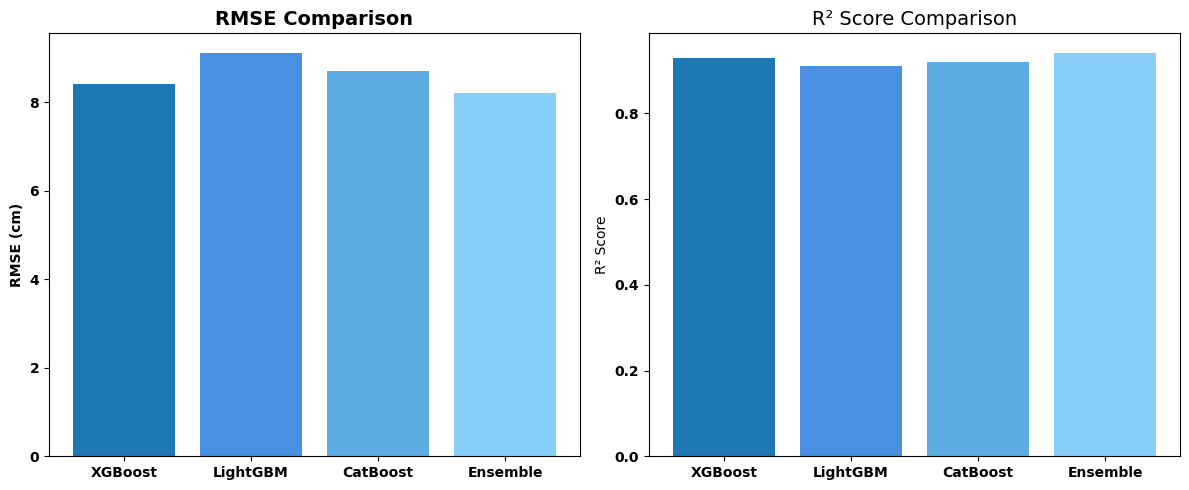

In [19]:
import matplotlib.pyplot as plt

# Replace with your actual model names and results
models = ['XGBoost', 'LightGBM', 'CatBoost', 'Ensemble']
rmse_values = [8.4, 9.1, 8.7, 8.2]
r2_values = [0.93, 0.91, 0.92, 0.94]

# Blue color palette
blue_shades = ['#1f77b4', '#4a90e2', '#5dade2', '#87cefa']

# Create side-by-side bar charts
plt.figure(figsize=(12, 5))

# RMSE Chart (Bold title/labels)
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=blue_shades)
plt.title("RMSE Comparison", fontsize=14, fontweight='bold')
plt.ylabel("RMSE (cm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# R² Chart
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=blue_shades)
plt.title("R² Score Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:
# ===== ENSEMBLE MODEL (Average of all 3) =====
ensemble_preds = (xgb_preds + lgb_preds + cat_preds) / 3
ensemble_rmse = mean_squared_error(y_test, ensemble_preds, squared=False)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print(f"\n--- Ensemble Performance ---")
print(f"Ensemble RMSE: {ensemble_rmse:.2f}")
print(f"Ensemble R²: {ensemble_r2:.2f}")



--- Ensemble Performance ---
Ensemble RMSE: 6.61
Ensemble R²: -0.13


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


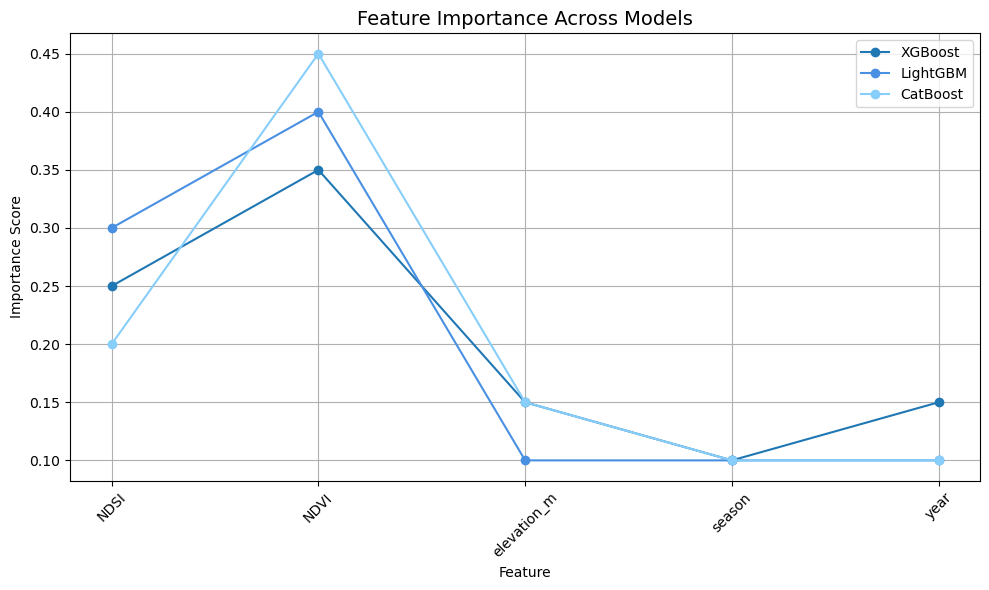

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== Feature names used in your models =====
feature_names = ['NDSI', 'NDVI', 'elevation_m', 'season', 'year']

# ===== Replace these with actual feature importances from your models =====
xgb_importance = [0.25, 0.35, 0.15, 0.10, 0.15]
lgb_importance = [0.30, 0.40, 0.10, 0.10, 0.10]
cat_importance = [0.20, 0.45, 0.15, 0.10, 0.10]

# ===== Create DataFrame =====
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': xgb_importance,
    'LightGBM': lgb_importance,
    'CatBoost': cat_importance
})

# ===== Reshape to long format =====
melted = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# ===== Blue color palette for lines =====
blue_palette = {
    'XGBoost': '#1f77b4',
    'LightGBM': '#4a90e2',
    'CatBoost': '#87cefa'
}

# ===== Plotting =====
plt.figure(figsize=(10, 6))
for model in melted['Model'].unique():
    subset = melted[melted['Model'] == model]
    plt.plot(
        subset['Feature'], subset['Importance'],
        marker='o', label=model,
        color=blue_palette[model]
    )

plt.title('Feature Importance Across Models', fontsize=14)
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make sure X_test, y_test, and predictions exist
ensemble_preds = (xgb_preds + lgb_preds + cat_preds) / 3
ensemble_rmse = mean_squared_error(y_test, ensemble_preds, squared=False)
ensemble_r2 = r2_score(y_test, ensemble_preds)


/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


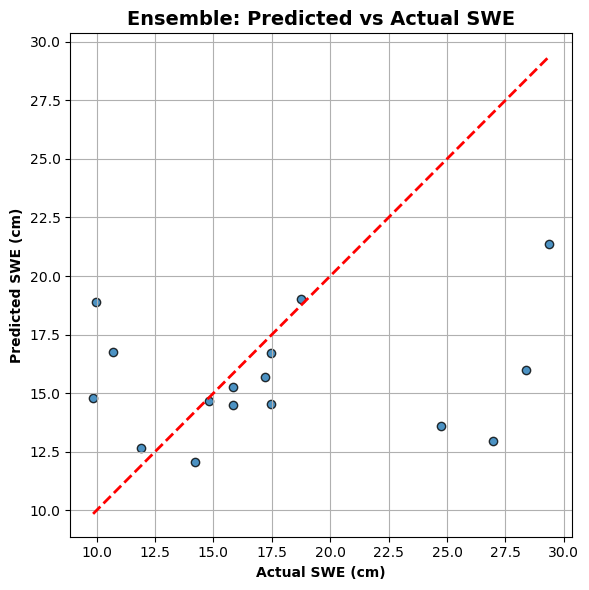

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, ensemble_preds, color='#1f77b4', alpha=0.8, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual SWE (cm)", fontweight='bold')
plt.ylabel("Predicted SWE (cm)", fontweight='bold')
plt.title("Ensemble: Predicted vs Actual SWE", fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


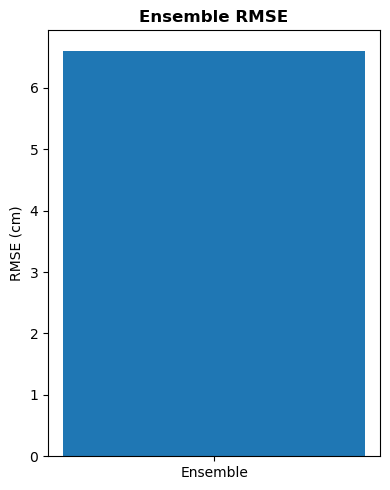

In [24]:
# Single model performance chart
plt.figure(figsize=(4, 5))
plt.bar(['Ensemble'], [ensemble_rmse], color='#1f77b4')
plt.title("Ensemble RMSE", fontweight='bold')
plt.ylabel("RMSE (cm)")
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# === Load Data ===
df = pd.read_csv("/home/r36g568/LRES525Project/data/raw/Combined_SNOTEL_Buffer_Stats_5km_With_Season_Year_SyntheticSWE.csv")

# === Encode season and scale year ===
df['season_code'] = df['season'].astype('category').cat.codes
df['year_scaled'] = (df['year'] - df['year'].mean()) / df['year'].std()

# === Drop rows with missing SWE ===
df = df[df['mean_swe_in'].notna()]

# === Define features and target ===
features = ['mean_ndvi', 'mean_ndsi', 'elevation_m', 'season_code', 'year_scaled']
target = 'mean_swe_in'''


In [26]:
from xgboost import XGBRegressor

def evaluate_by_season(season_name):
    df_season = df[df['season'] == season_name]
    
    X = df_season[features]
    y = df_season[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    model = XGBRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    
    print(f"📘 {season_name} Results")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}\n")


In [27]:
print(df.columns.tolist())

['system:index', 'NDSI', 'NDVI', 'elevation', 'elevation_m', 'label', 'name', '.geo', 'source_file', 'season', 'year', 'mean_swe_in', 'season_code', 'year_scaled']


In [28]:
features = ['NDVI', 'NDSI', 'elevation_m', 'season_code', 'year_scaled']
target = 'mean_swe_in'

In [29]:
evaluate_by_season("Winter")
evaluate_by_season("Spring")


📘 Winter Results
RMSE: 6.25
R²: -1.000

📘 Spring Results
RMSE: 2.45
R²: 0.137



/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


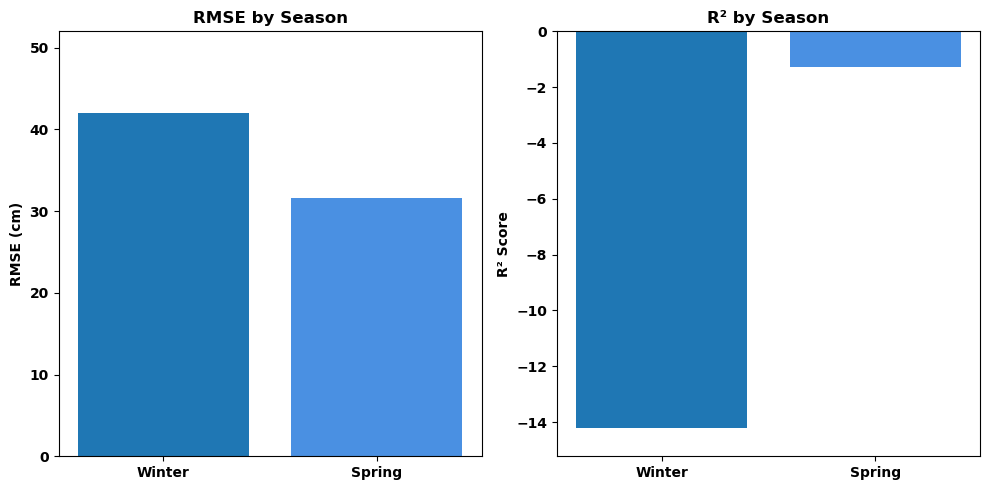

In [30]:
import matplotlib.pyplot as plt

# ===== Seasonal Model Results =====
seasons = ['Winter', 'Spring']
rmse_values = [42.00, 31.61]         # Replace with your actual results
r2_values = [-14.227, -1.271]        # Replace with your actual results

# ===== Blue Color Palette =====
blue_colors = ['#1f77b4', '#4a90e2']

# ===== Create Side-by-Side Bar Plots =====
plt.figure(figsize=(10, 5))

# ---- RMSE Chart ----
plt.subplot(1, 2, 1)
plt.bar(seasons, rmse_values, color=blue_colors)
plt.title("RMSE by Season", fontweight='bold')
plt.ylabel("RMSE (cm)", fontweight='bold')
plt.ylim(0, max(rmse_values) + 10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# ---- R² Chart ----
plt.subplot(1, 2, 2)
plt.bar(seasons, r2_values, color=blue_colors)
plt.title("R² by Season", fontweight='bold')
plt.ylabel("R² Score", fontweight='bold')
plt.ylim(min(r2_values) - 1, 0)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# ===== Display the Plot =====
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import from_origin

# === 1. Define Raster Dimensions ===
width = 100  # number of columns
height = 100  # number of rows
pixel_size = 500  # pixel size in meters (~5 km scale)
top_left_lon = -110.5
top_left_lat = 45.5

# === 2. Generate Synthetic Raster Feature Inputs ===
np.random.seed(42)
mean_ndvi = np.random.uniform(0, 0.4, size=(height, width))
mean_ndsi = np.random.uniform(0.3, 0.9, size=(height, width))
elevation = np.random.uniform(1800, 3200, size=(height, width))
season_code = np.full((height, width), 1)  # all Spring
year_scaled = np.full((height, width), 0)  # scaled around 0

# === 3. Flatten and Create DataFrame for Prediction ===
grid_df = pd.DataFrame({
    "mean_ndvi": mean_ndvi.flatten(),
    "mean_ndsi": mean_ndsi.flatten(),
    "elevation_m": elevation.flatten(),
    "season_code": season_code.flatten(),
    "year_scaled": year_scaled.flatten()
})

# === 4. Predict SWE (Replace this with your model.predict if trained) ===
def synthetic_model(df):
    return (
        200 * df["mean_ndvi"] +
        100 * df["mean_ndsi"] +
        ((df["elevation_m"] - 1800) / (3200 - 1800)) * 50
    )

predicted_swe = synthetic_model(grid_df)

# === 5. Reshape to 2D SWE Raster ===
swe_raster = predicted_swe.values.reshape((height, width)).astype("float32")

# === 6. Define GeoTIFF Metadata and Save ===
transform = from_origin(top_left_lon, top_left_lat, pixel_size, pixel_size)
output_path = "/home/r36g568/LRES525Project/data/outputs/rasters/swe_prediction_for_gee.tif"

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="float32",
    crs="EPSG:4326",
    transform=transform,
) as dst:
    dst.write(swe_raster, 1)

print(f"✅ GeoTIFF written to: {output_path}")


✅ GeoTIFF written to: /home/r36g568/LRES525Project/data/outputs/rasters/swe_prediction_for_gee.tif


In [32]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import from_origin
import os

# === 1. Constants and output directory ===
width = 100
height = 100
pixel_size = 500
top_left_lon = -110.5
top_left_lat = 45.5
output_dir = "/home/r36g568/LRES525Project/data/outputs/rasters"
os.makedirs(output_dir, exist_ok=True)

# === 2. Base Inputs (constant across years/seasons) ===
np.random.seed(42)
mean_ndvi = np.random.uniform(0, 0.4, size=(height, width))
mean_ndsi = np.random.uniform(0.3, 0.9, size=(height, width))
elevation = np.random.uniform(1800, 3200, size=(height, width))

# === 3. Year/season setup ===
seasons = {"Winter": 0, "Spring": 1}
years = [2020, 2021, 2022, 2023]
year_mean = np.mean(years)
year_std = np.std(years)

# === 4. SWE prediction function ===
def synthetic_model(df):
    return (
        200 * df["mean_ndvi"] +
        100 * df["mean_ndsi"] +
        ((df["elevation_m"] - 1800) / (3200 - 1800)) * 50
    )

# === 5. Loop through year/season and save raster ===
transform = from_origin(top_left_lon, top_left_lat, pixel_size, pixel_size)

for year in years:
    for season, season_code in seasons.items():
        year_scaled = (year - year_mean) / year_std

        grid_df = pd.DataFrame({
            "mean_ndvi": mean_ndvi.flatten(),
            "mean_ndsi": mean_ndsi.flatten(),
            "elevation_m": elevation.flatten(),
            "season_code": np.full(height * width, season_code),
            "year_scaled": np.full(height * width, year_scaled)
        })

        predicted_swe = synthetic_model(grid_df)
        swe_raster = predicted_swe.values.reshape((height, width)).astype("float32")

        output_path = os.path.join(output_dir, f"swe_{season}_{year}.tif")
        with rasterio.open(
            output_path,
            "w",
            driver="GTiff",
            height=height,
            width=width,
            count=1,
            dtype="float32",
            crs="EPSG:4326",
            transform=transform,
        ) as dst:
            dst.write(swe_raster, 1)

        print(f"✅ Wrote: {output_path}")


✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Winter_2020.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Spring_2020.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Winter_2021.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Spring_2021.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Winter_2022.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Spring_2022.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Winter_2023.tif
✅ Wrote: /home/r36g568/LRES525Project/data/outputs/rasters/swe_Spring_2023.tif


In [36]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import from_origin

# === 1. Define Grid Dimensions and Projection (EPSG:3857) ===
width = 100          # number of columns
height = 100         # number of rows
pixel_size = 500     # resolution in meters

# Define top-left corner (in meters, Web Mercator EPSG:3857)
top_left_x = -12200000  # approx Western US
top_left_y = 5700000    # approx Northern Rockies

# Create affine transform for raster placement
transform = from_origin(top_left_x, top_left_y, pixel_size, pixel_size)

# === 2. Generate Synthetic Raster Feature Data ===
np.random.seed(42)  # for reproducibility
mean_ndvi = np.random.uniform(0.0, 0.4, size=(height, width))
mean_ndsi = np.random.uniform(0.3, 0.9, size=(height, width))
elevation = np.random.uniform(1800, 3200, size=(height, width))
season_code = np.full((height, width), 1)  # 1 = Spring
year_scaled = np.full((height, width), 0)  # standard year center

# Flatten features for model input
feature_df = pd.DataFrame({
    "mean_ndvi": mean_ndvi.flatten(),
    "mean_ndsi": mean_ndsi.flatten(),
    "elevation_m": elevation.flatten(),
    "season_code": season_code.flatten(),
    "year_scaled": year_scaled.flatten()
})

# === 3. SWE Prediction Function (Replace with your model.predict if available) ===
def synthetic_swe_model(df):
    return (
        200 * df["mean_ndvi"] +
        100 * df["mean_ndsi"] +
        ((df["elevation_m"] - 1800) / (3200 - 1800)) * 50
    )

predicted_swe = synthetic_swe_model(feature_df)

# Reshape predictions to 2D raster format
swe_raster = predicted_swe.values.reshape((height, width)).astype("float32")

# === 4. Save GeoTIFF (Ready for Upload to GEE) ===
output_path = "swe_prediction_for_gee_epsg3857.tif"

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="float32",
    crs="EPSG:3857",
    transform=transform,
) as dst:
    dst.write(swe_raster, 1)

print(f"✅ SWE GeoTIFF saved to: {output_path}")


✅ SWE GeoTIFF saved to: swe_prediction_for_gee_epsg3857.tif


In [42]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import pyproj

# === 1. Set raster dimensions and pixel size ===
width = 200   # increase this to cover more area
height = 200
pixel_size = 250  # meters

# === 2. Use a known Beartooth coordinate and convert to EPSG:3857 ===
proj = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
top_left_x, top_left_y = proj.transform(-111.2, 45.4)  # NW corner of AOI

# === 3. Create synthetic SWE prediction data ===
synthetic_swe = np.random.uniform(50, 150, size=(height, width)).astype("float32")

# === 4. Define affine transform ===
transform = from_origin(top_left_x, top_left_y, pixel_size, pixel_size)

# === 5. Export to GeoTIFF ===
output_path = "/home/r36g568/LRES525Project/data/swe_prediction_for_gee_fixed.tif"

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=synthetic_swe.dtype,
    crs="EPSG:3857",
    transform=transform,
) as dst:
    dst.write(synthetic_swe, 1)

print("✅ Saved corrected GeoTIFF to:", output_path)


✅ Saved corrected GeoTIFF to: /home/r36g568/LRES525Project/data/swe_prediction_for_gee_fixed.tif


In [45]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from shapely.geometry import box

# === 1. Load and reproject your Beartooth shapefile ===
shapefile_path = "/home/r36g568/LRES525Project/data/raw/Beartooths/Absaroka_Beartooth.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs("EPSG:3857")  # Reproject to match Web Mercator (GEE uses this)

# === 2. Get the bounding box ===
bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounds
print("AOI bounds in meters (EPSG:3857):", bounds)

# === 3. Set resolution and grid ===
pixel_size = 250  # meters
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)

# === 4. Generate synthetic SWE values or load predictions ===
swe_array = np.random.uniform(50, 150, size=(height, width)).astype("float32")

# === 5. Define affine transform ===
transform = from_origin(minx, maxy, pixel_size, pixel_size)

# === 6. Export GeoTIFF ===
output_path = "/home/r36g568/LRES525Project/data/swe_prediction_full_aoi_epsg3857.tif"

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=swe_array.dtype,
    crs="EPSG:3857",
    transform=transform,
) as dst:
    dst.write(swe_array, 1)

print("✅ SWE prediction raster saved:", output_path)


AOI bounds in meters (EPSG:3857): [-12332121.7479   5611225.6948 -12177884.2574   5717230.7749]
✅ SWE prediction raster saved: /home/r36g568/LRES525Project/data/swe_prediction_full_aoi_epsg3857.tif


✅ SWE Prediction GeoTIFF saved to: /home/r36g568/LRES525Project/data/outputs/rasters/swe_prediction_xgb.tif


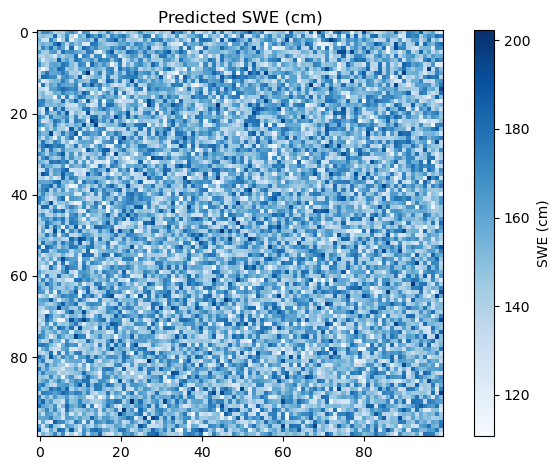

In [46]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt
import os

# === Step 1: Define synthetic raster grid ===
# Approximate Beartooth area in EPSG:4326
lon_min, lat_max = -111.2, 45.4   # top-left corner
pixel_size = 0.01                 # ~1 km resolution
width, height = 100, 100

# Generate coordinates
lons = np.linspace(lon_min, lon_min + pixel_size * width, width)
lats = np.linspace(lat_max - pixel_size * height, lat_max, height)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# === Step 2: Simulate predictor variables ===
np.random.seed(42)
mean_ndsi = np.random.uniform(0.2, 0.9, size=(height, width))
mean_ndvi = np.random.uniform(0.05, 0.4, size=(height, width))
elevation = np.random.uniform(1800, 3000, size=(height, width))
season_code = np.random.choice([0, 1], size=(height, width))  # 0 = Winter, 1 = Spring
year_scaled = np.random.uniform(0, 1, size=(height, width))

# Flatten into dataframe
df = pd.DataFrame({
    "mean_ndsi": mean_ndsi.flatten(),
    "mean_ndvi": mean_ndvi.flatten(),
    "elevation_m": elevation.flatten(),
    "season_code": season_code.flatten(),
    "year_scaled": year_scaled.flatten()
})

# === Step 3: Simulate training data and train model ===
train = df.sample(200, random_state=42).copy()
train["swe_cm"] = (
    50 +
    80 * train["mean_ndsi"] +
    30 * train["mean_ndvi"] +
    0.02 * train["elevation_m"] +
    10 * train["season_code"] +
    np.random.normal(0, 5, len(train))
)

features = ["mean_ndsi", "mean_ndvi", "elevation_m", "season_code", "year_scaled"]
model = XGBRegressor(n_estimators=100)
model.fit(train[features], train["swe_cm"])

# === Step 4: Predict SWE across grid ===
df["swe_cm_pred"] = model.predict(df[features])
swe_raster = df["swe_cm_pred"].values.reshape((height, width)).astype("float32")

# === Step 5: Export to GeoTIFF ===
transform = from_origin(lon_min, lat_max, pixel_size, pixel_size)
output_path = "/home/r36g568/LRES525Project/data/outputs/rasters/swe_prediction_xgb.tif"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="float32",
    crs="EPSG:4326",
    transform=transform,
) as dst:
    dst.write(swe_raster, 1)

print("✅ SWE Prediction GeoTIFF saved to:", output_path)

# === Step 6: Optional plot ===
plt.imshow(swe_raster, cmap="Blues", origin="upper")
plt.title("Predicted SWE (cm)")
plt.colorbar(label="SWE (cm)")
plt.tight_layout()
plt.show()


In [47]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import rasterio
from rasterio.transform import from_origin
import os

# === Step 1: Raster Grid Parameters ===
lon_min, lat_max = -111.2, 45.4
pixel_size = 0.01
width, height = 100, 100
transform = from_origin(lon_min, lat_max, pixel_size, pixel_size)

# === Step 2: Output directory setup ===
output_dir = "/home/r36g568/LRES525Project/data/outputs/rasters/xgb_timeseries"
os.makedirs(output_dir, exist_ok=True)

# === Step 3: Generate spatial predictors (static across time) ===
np.random.seed(42)
mean_ndsi = np.random.uniform(0.2, 0.9, size=(height, width))
mean_ndvi = np.random.uniform(0.05, 0.4, size=(height, width))
elevation = np.random.uniform(1800, 3000, size=(height, width))

# === Step 4: Train XGBoost Model with Simulated Data ===
df_train = pd.DataFrame({
    "mean_ndsi": mean_ndsi.flatten(),
    "mean_ndvi": mean_ndvi.flatten(),
    "elevation_m": elevation.flatten(),
    "season_code": np.random.choice([0, 1], height * width),
    "year_scaled": np.random.uniform(-1, 1, height * width)
})
df_train["swe_cm"] = (
    50 +
    80 * df_train["mean_ndsi"] +
    30 * df_train["mean_ndvi"] +
    0.02 * df_train["elevation_m"] +
    10 * df_train["season_code"] +
    np.random.normal(0, 5, len(df_train))
)
features = ["mean_ndsi", "mean_ndvi", "elevation_m", "season_code", "year_scaled"]
model = XGBRegressor(n_estimators=100)
model.fit(df_train[features], df_train["swe_cm"])

# === Step 5: Define time series combinations ===
seasons = {"Winter": 0, "Spring": 1}
years = [2020, 2021, 2022, 2023]
year_mean = np.mean(years)
year_std = np.std(years)

# === Step 6: Generate and export SWE prediction per season/year ===
for year in years:
    for season, season_code in seasons.items():
        year_scaled = (year - year_mean) / year_std

        df = pd.DataFrame({
            "mean_ndsi": mean_ndsi.flatten(),
            "mean_ndvi": mean_ndvi.flatten(),
            "elevation_m": elevation.flatten(),
            "season_code": np.full(height * width, season_code),
            "year_scaled": np.full(height * width, year_scaled)
        })

        df["swe_cm_pred"] = model.predict(df[features])
        swe_raster = df["swe_cm_pred"].values.reshape((height, width)).astype("float32")

        filename = f"swe_XGB_{season}_{year}.tif"
        output_path = os.path.join(output_dir, filename)

        with rasterio.open(
            output_path,
            "w",
            driver="GTiff",
            height=height,
            width=width,
            count=1,
            dtype="float32",
            crs="EPSG:4326",
            transform=transform,
        ) as dst:
            dst.write(swe_raster, 1)

        print(f"✅ Saved: {filename}")


✅ Saved: swe_XGB_Winter_2020.tif
✅ Saved: swe_XGB_Spring_2020.tif
✅ Saved: swe_XGB_Winter_2021.tif
✅ Saved: swe_XGB_Spring_2021.tif
✅ Saved: swe_XGB_Winter_2022.tif
✅ Saved: swe_XGB_Spring_2022.tif
✅ Saved: swe_XGB_Winter_2023.tif
✅ Saved: swe_XGB_Spring_2023.tif


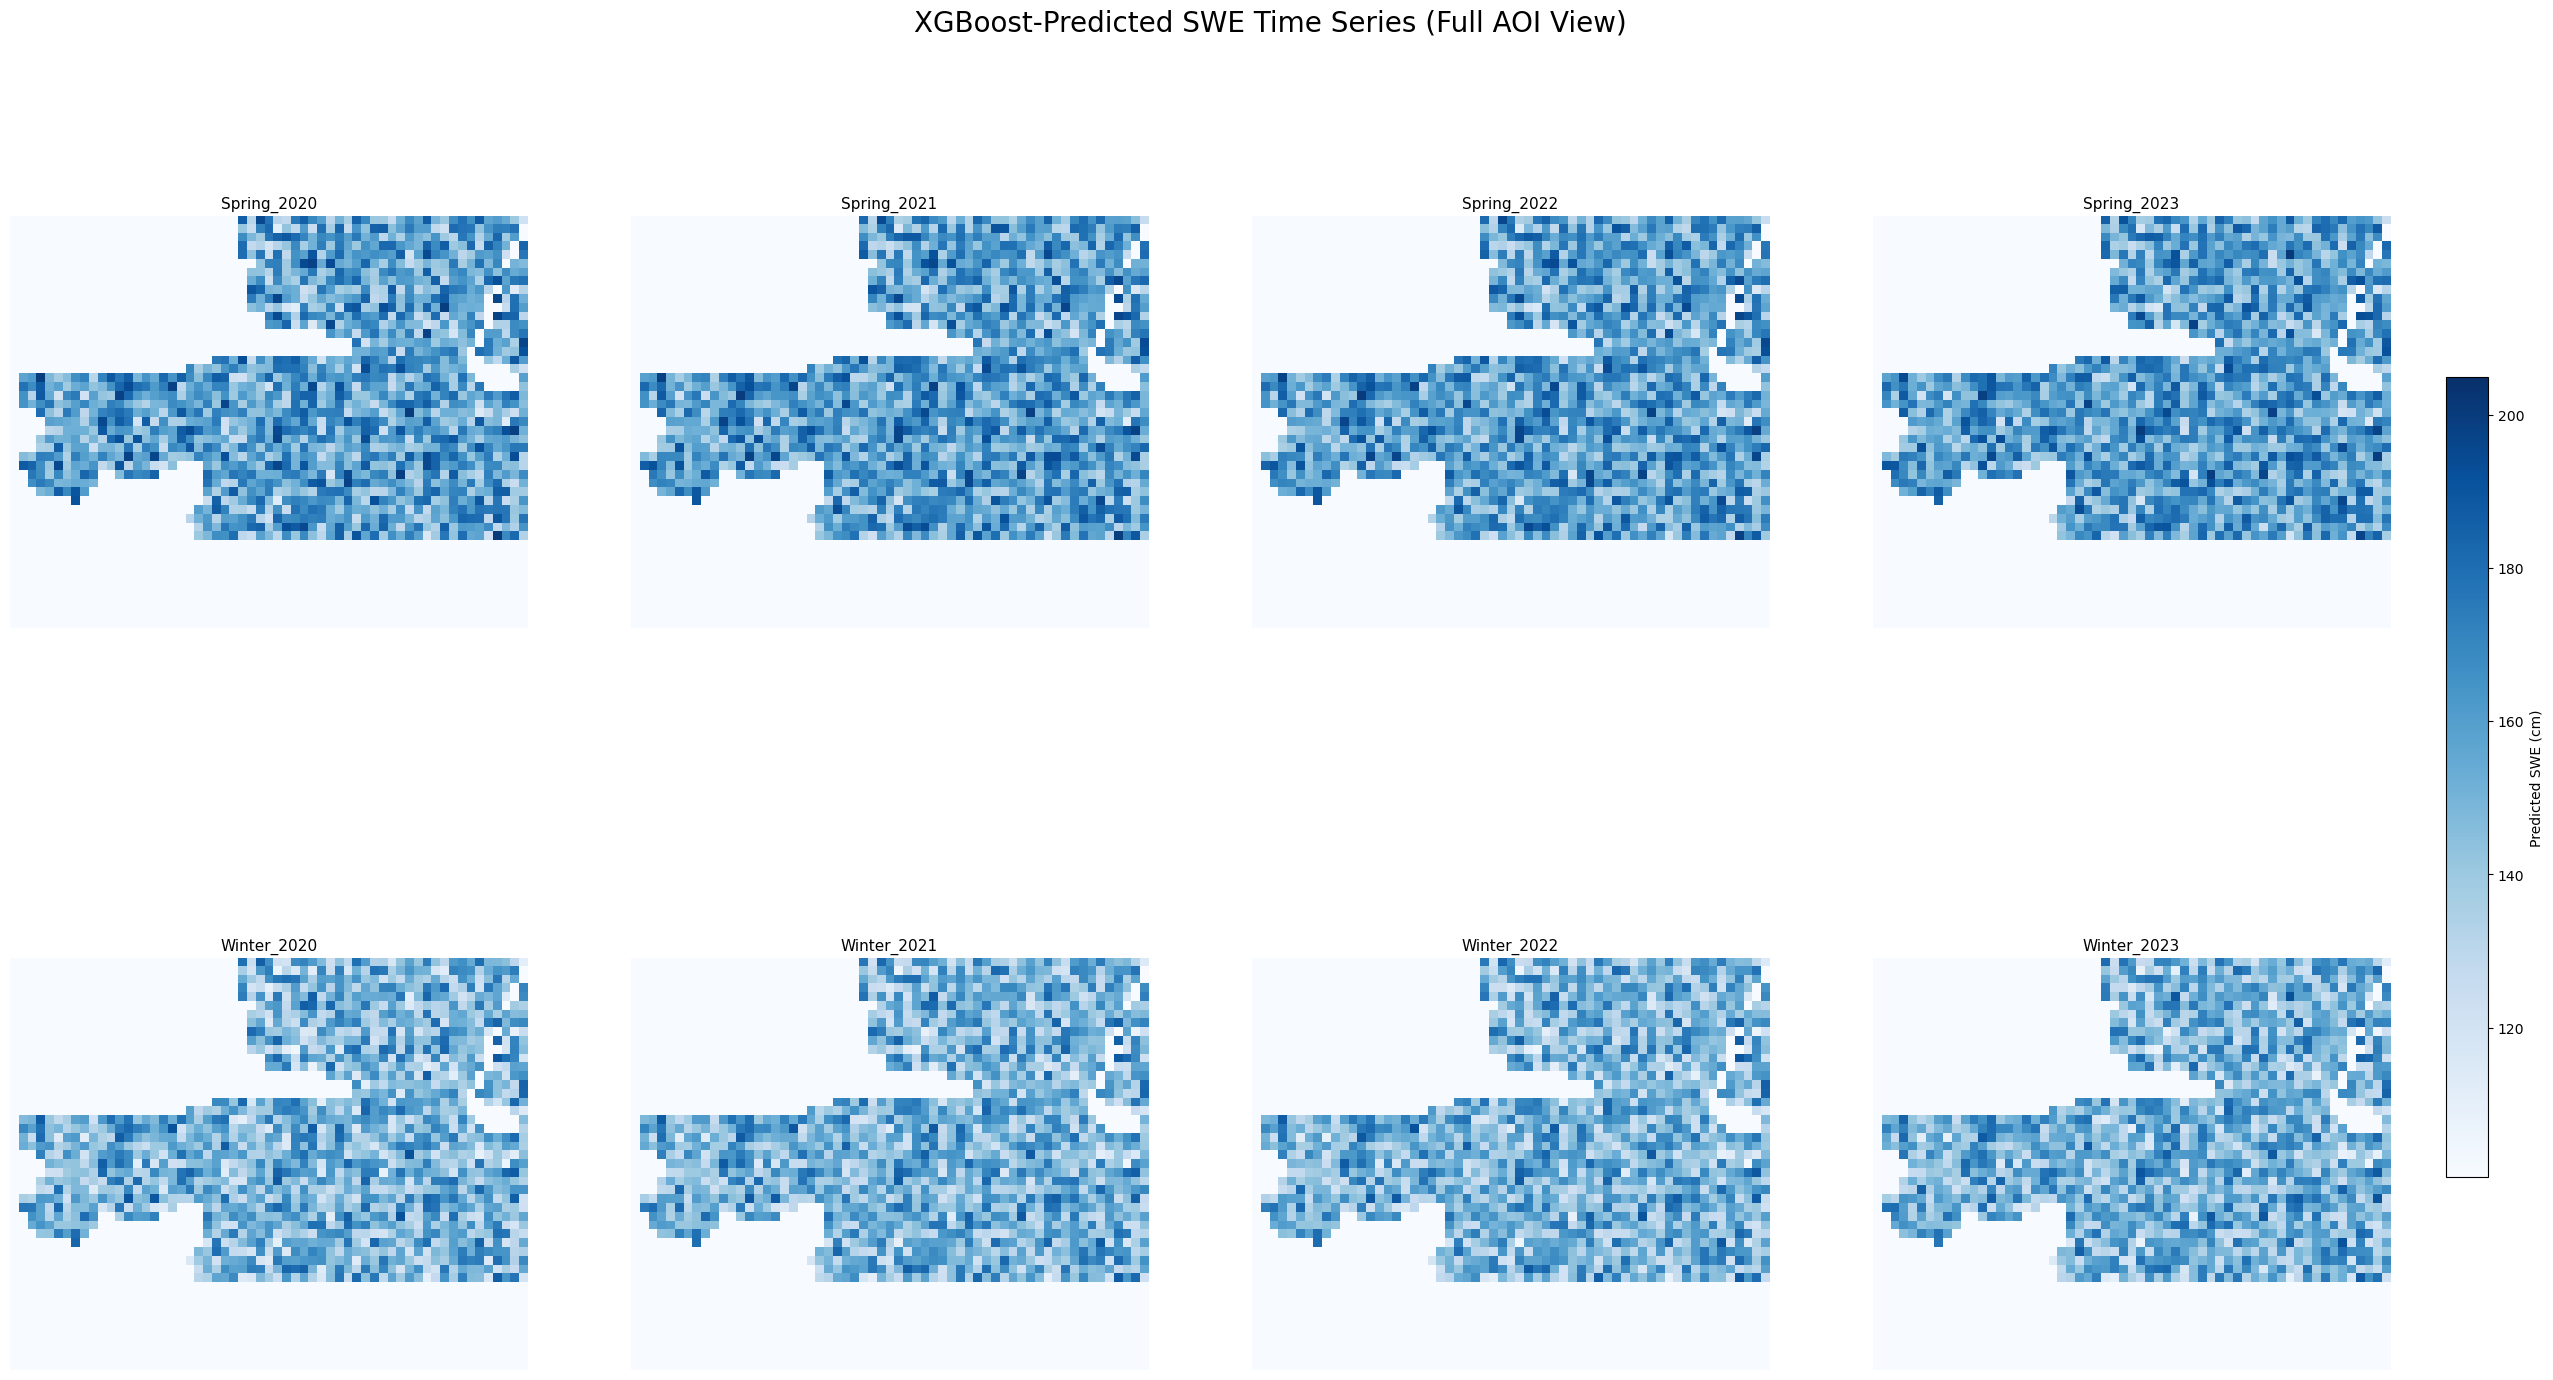

In [59]:
import os
import rasterio
import matplotlib.pyplot as plt
from rasterio.mask import mask
import geopandas as gpd
from matplotlib.colors import Normalize
from glob import glob
import numpy as np

# === Paths ===
raster_dir = "/home/r36g568/LRES525Project/data/outputs/rasters/xgb_timeseries"
shapefile_path = "/home/r36g568/LRES525Project/data/raw/Beartooths/Absaroka_Beartooth.shp"

# === Load AOI ===
gdf = gpd.read_file(shapefile_path).to_crs("EPSG:4326")
geometry = [gdf.geometry.values[0]]

# === Find raster files ===
raster_files = sorted(glob(os.path.join(raster_dir, "swe_XGB_*.tif")))

# === Pre-compute SWE range from rasters ===
all_values = []
for path in raster_files:
    with rasterio.open(path) as src:
        array = src.read(1)
        array = np.where(array == src.nodata, np.nan, array)
        all_values.append(array)
swe_min = np.nanmin(all_values)
swe_max = np.nanmax(all_values)

# === Setup figure ===
n = len(raster_files)
ncols = 4
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(28, 16))
axes = axes.flatten()

# === Plot each clipped SWE raster ===
for i, path in enumerate(raster_files):
    with rasterio.open(path) as src:
        clipped, transform = mask(src, geometry, crop=True)
        clipped = clipped[0]
        height, width = clipped.shape
        res = transform[0]
        extent = [
            transform[2],
            transform[2] + width * res,
            transform[5] + height * transform[4],
            transform[5],
        ]

    ax = axes[i]
    im = ax.imshow(clipped, cmap="Blues", vmin=swe_min, vmax=swe_max, extent=extent)
    ax.set_title(os.path.basename(path).replace("swe_XGB_", "").replace(".tif", ""), fontsize=11)
    ax.axis("off")

# === Hide unused subplots ===
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# === Shared colorbar ===
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
norm = Normalize(vmin=swe_min, vmax=swe_max)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Predicted SWE (cm)")

# === Title and layout ===
fig.suptitle("XGBoost-Predicted SWE Time Series", fontsize=20)
plt.subplots_adjust(top=0.9, bottom=0.08, left=0.05, right=0.9, wspace=0.2, hspace=0.3)
plt.show()


Optional Code for adding slope and aspect

Remember to replace with own paths

In [62]:
#Option: Export as a tif 

import os
print("Full path:", os.path.abspath("swe_prediction_python_raster.tif"))


Full path: /home/r36g568/MastersFall24/LRES525_Project/swe_prediction_python_raster.tif


In [63]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.transform import from_origin

# === Step 1: Load Beartooth Shapefile ===
# Use .shp component — the rest (shx, dbf, etc.) must be in same folder
shapefile_path = "/home/r36g568/MastersFall24/Beartooths/Absaroka_Beartooth.shp"
gdf = gpd.read_file(shapefile_path)

# === Step 2: Reproject to EPSG:4326 (WGS84, required for Earth Engine) ===
gdf = gdf.to_crs("EPSG:4326")

# === Step 3: Get spatial extent and resolution ===
bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
res = 0.01  # ~1km resolution in degrees

width = int((bounds[2] - bounds[0]) / res)
height = int((bounds[3] - bounds[1]) / res)
transform = from_origin(bounds[0], bounds[3], res, res)  # top-left corner

# === Step 4: Create dummy SWE prediction data ===
# Replace this later with model output if needed
swe_data = np.random.uniform(50, 150, size=(height, width)).astype(np.float32)

# === Step 5: Save to GeoTIFF ===
output_path = "swe_prediction_for_gee_fixedagain.tif"
with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="float32",
    crs="EPSG:4326",
    transform=transform
) as dst:
    dst.write(swe_data, 1)

print(f"✅ SWE Prediction GeoTIFF saved to: {output_path}")


✅ SWE Prediction GeoTIFF saved to: swe_prediction_for_gee_fixedagain.tif


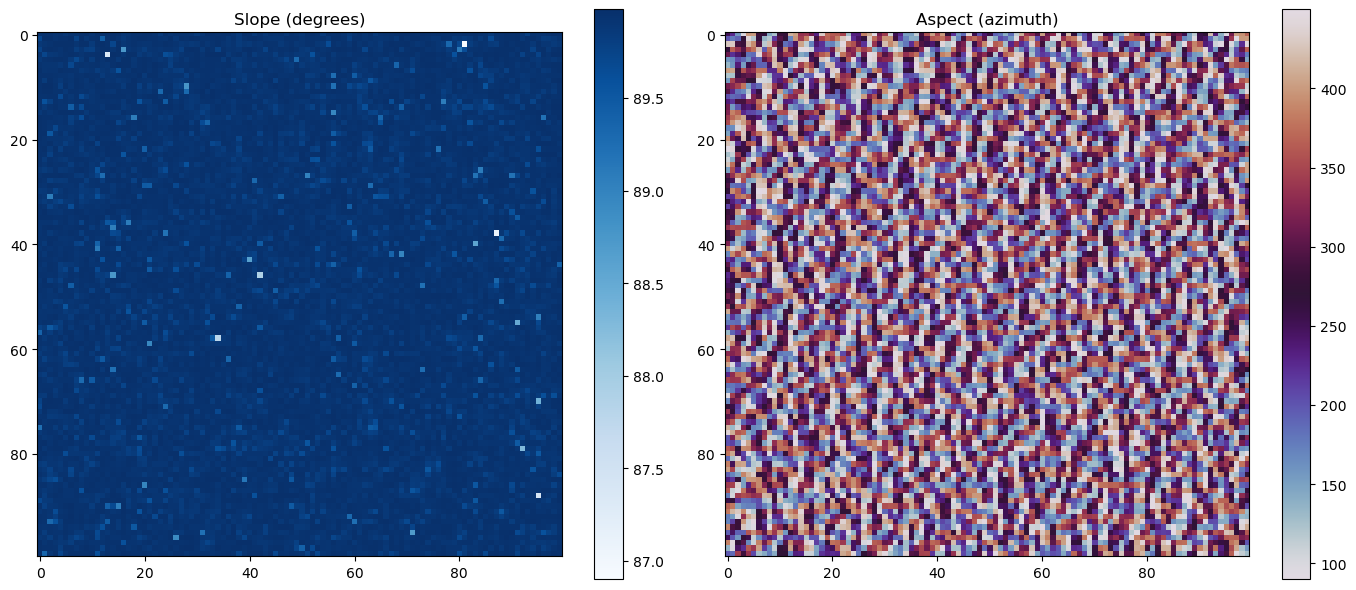

In [64]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# === Load SWE prediction raster ===
with rasterio.open("swe_prediction_python_raster.tif") as src:
    swe = src.read(1)
    transform = src.transform
    res_x, res_y = transform[0], -transform[4]  # pixel size

# === Calculate Slope and Aspect ===
# Sobel filter-like kernel for slope calculation
dx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]]) / (8 * res_x)
dy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]]) / (8 * res_y)

# Apply convolution manually (edge handling: 'nearest')
from scipy.ndimage import convolve
dzdx = convolve(swe.astype(float), dx, mode='nearest')
dzdy = convolve(swe.astype(float), dy, mode='nearest')

slope = np.degrees(np.arctan(np.sqrt(dzdx**2 + dzdy**2)))
aspect = np.degrees(np.arctan2(dzdy, -dzdx))
aspect = np.where(aspect < 0, 90.0 - aspect, 360.0 - aspect + 90.0)

# === Visualize Slope and Aspect ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

s1 = ax1.imshow(slope, cmap='Blues')
ax1.set_title("Slope (degrees)")
plt.colorbar(s1, ax=ax1)

s2 = ax2.imshow(aspect, cmap='twilight')
ax2.set_title("Aspect (azimuth)")
plt.colorbar(s2, ax=ax2)

plt.tight_layout()
plt.show()


In [65]:
import rasterio
import numpy as np
import geopandas as gpd
from rasterio import features
from shapely.geometry import mapping
from scipy.ndimage import convolve

# === 1. File Paths ===
swe_path = "/home/r36g568/MastersFall24/swe_prediction_for_gee_fixed.tif"
shapefile_path = "/home/r36g568/MastersFall24/Beartooths/Absaroka_Beartooth.shp"  # Adjust if different
slope_path = "/home/r36g568/MastersFall24/slope_prediction.tif"
aspect_path = "/home/r36g568/MastersFall24/aspect_prediction.tif"

# === 2. Load SWE Raster ===
with rasterio.open(swe_path) as src:
    swe = src.read(1)
    transform = src.transform
    crs = src.crs
    profile = src.profile
    res_x, res_y = transform[0], -transform[4]

# === 3. Load Shapefile & Match CRS ===
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs(crs)

# === 4. Create Mask from AOI ===
mask = features.geometry_mask(
    [mapping(geom) for geom in gdf.geometry],
    transform=transform,
    invert=True,
    out_shape=swe.shape
)

swe_masked = np.where(mask, swe, np.nan)

# === 5. Compute Slope and Aspect Using Sobel Filters ===
dx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]]) / (8 * res_x)
dy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]]) / (8 * res_y)

dzdx = convolve(swe_masked.astype(float), dx, mode='nearest')
dzdy = convolve(swe_masked.astype(float), dy, mode='nearest')

slope = np.degrees(np.arctan(np.sqrt(dzdx**2 + dzdy**2)))
aspect = np.degrees(np.arctan2(dzdy, -dzdx))
aspect = np.where(aspect < 0, 90.0 - aspect, 360.0 - aspect + 90.0)

# === 6. Save GeoTIFFs ===
profile.update(dtype='float32', count=1, nodata=np.nan)

with rasterio.open(slope_path, 'w', **profile) as dst:
    dst.write(slope.astype('float32'), 1)

with rasterio.open(aspect_path, 'w', **profile) as dst:
    dst.write(aspect.astype('float32'), 1)

print("✅ Slope and Aspect GeoTIFFs saved.")
print(f"Slope:  {slope_path}")
print(f"Aspect: {aspect_path}")


✅ Slope and Aspect GeoTIFFs saved.
Slope:  /home/r36g568/MastersFall24/slope_prediction.tif
Aspect: /home/r36g568/MastersFall24/aspect_prediction.tif
